In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy


import pandas_datareader.data as web
import datetime


# scrapping financial data from the web

start = datetime.datetime(2011, 3, 8)
end = datetime.datetime(2021, 3, 8)

SP500 = web.DataReader(['sp500'], 'fred', start, end)



KeyboardInterrupt: 

In [2]:
SP500['daily return'] = (SP500['sp500']/SP500['sp500'].shift(1)) -1
SP500.dropna(inplace = True)



# shows, plots daily returns of S&P500 Index

print(type(SP500))
print(type(SP500['daily return']))
print(SP500['daily return'])
SP500['daily return'].plot(title = "S&P500 Daily Returns")



NameError: name 'SP500' is not defined

In [3]:
from sklearn.neighbors import KernelDensity
import seaborn as sns

# reshape data 

x = SP500['daily return'].array
print("data type of x is: ",type(x))
X = x.to_numpy()
print("data type of X is: ",type(X))
print("The average daily return of the S&P500 is: ", np.average(X))




# initialize the kernel density estimation

kde = KernelDensity(kernel='gaussian', bandwidth = 0.019).fit(X[:, None])


# returns log of probability density

logprob = kde.score_samples(X[:, None])


# Plotting the kde

plt.fill_between(X, np.exp(logprob), alpha  = 0.6)

plt.plot(X, np.full_like(X, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.25, 25.25)

sns.kdeplot(X, shade = True)

NameError: name 'SP500' is not defined

# New dataset

In [4]:
import numpy as np



def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)


def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)


In [3]:
import pandas as pd
import yfinance as yf
import plotly.graph_objs as go


data = yf.download("AAPL", period = "10y")

print(type(data))

data.head()


# slicing data to just look at closing prices
apple = data["Close"]
apple.head()

# changing data from pandas data series to numpy array
Apple = np.array(apple)



# plot of Apple Price
plt.plot(Apple)
plt.title("Apple Price")
plt.xlabel("Days Elapsed")
plt.ylabel("Price in $")
plt.show()





# converting prices to returns

def financial_returns(x):
    return np.diff(x) / x[ : -1]


financial_returns(Apple)


# graph of returns

apple_returns = financial_returns(Apple)
plt.plot(apple_returns, "g")
plt.title("Apple Returns")
plt.xlabel("Time")
plt.ylabel(" % Return")
plt.show()









fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Apple daily returns")
ax1.text(-0.075,50,"Extreme Low returns")
ax1.text(0.05,50,"Extreme High returns")
plt.show()









# Gaussian Kernel function

def Gaussian_Kernel(x, h):
    return np.exp(-x**2/ 2 * h**2)


Gaussian_Kernel(1, 1)


Gaussian_Kernel(apple_returns, h = 0.1)
 


print(apple_returns.shape)









difference_matrix = []
for i in range(len(apple_returns)):
    for k in range(len(apple_returns)):
        difference_matrix.append(apple_returns[k] - apple_returns[i])
        M = np.mat(difference_matrix)


print(type(M))


GKM = Gaussian_Kernel(M, h=0.1)

GKM1 = GKM/GKM.sum(axis = 1)

plt.plot(GKM1)
plt.show()





[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>


NameError: name 'plt' is not defined

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>


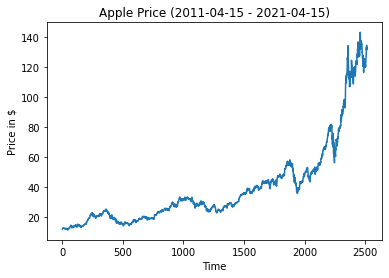

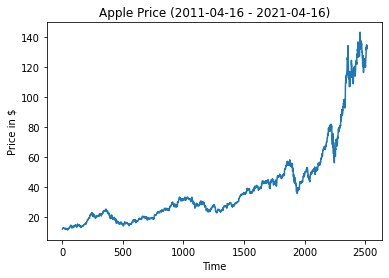

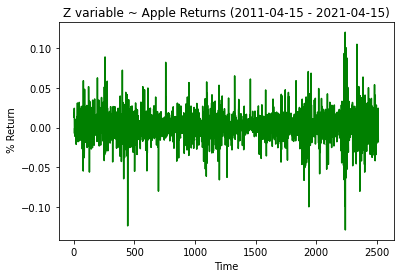

The std of Z is:  0.01810829667622595


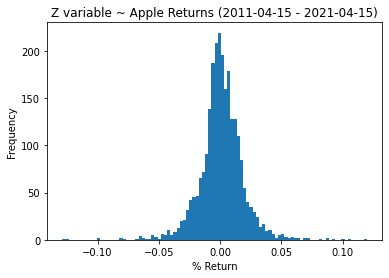

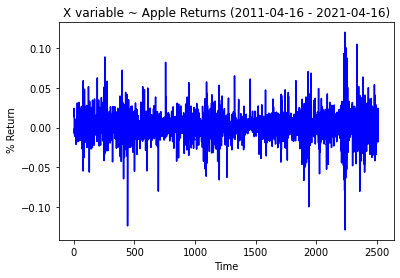

The std of X is:  0.018110034973475502


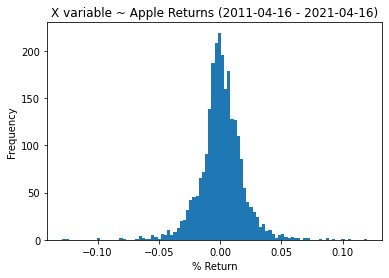

2514


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:125: DeprecationWarning:

scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead



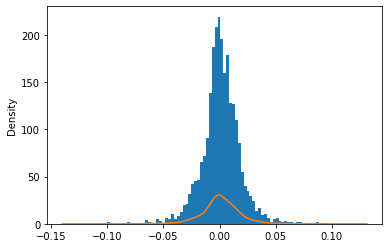

In [7]:
data = yf.download("AAPL", start = "2011-04-15", end = "2021-04-15")
data1 = yf.download("AAPL", start = "2011-04-16", end = "2021-04-16")
from scipy.spatial.distance import pdist, squareform
from scipy.spatial import distance_matrix
from scipy import stats
import seaborn as sns


print(type(data))

data.head()


# slicing data to just look at closing prices for Z
apple = data["Close"]
Time = data.copy()
Time['year'], Time['month'], Time['day'] = data.index.year, data.index.month, data.index.day
time_pandas = Time.iloc[:,[-1]]

apple.head()


# slicing data to just look at closing prices for X, changing to numpy array
apple1 = data1["Close"]
Apple1 = np.array(apple1)





# changing data from pandas data series to numpy array
Apple = np.array(apple)
time = np.array(time_pandas)


# plot of Apple Price
plt.plot(Apple)
plt.title("Apple Price (2011-04-15 - 2021-04-15)")
plt.xlabel("Time")
plt.ylabel("Price in $")
plt.show()



plt.plot(Apple1)
plt.title("Apple Price (2011-04-16 - 2021-04-16)")
plt.xlabel("Time")
plt.ylabel("Price in $")
plt.show()







# converting prices to returns

def financial_returns(x):
    return np.diff(x) / x[ : -1]





financial_returns(Apple)
financial_returns(Apple1)

# graph of returns Z

apple_returns = financial_returns(Apple)
plt.plot(apple_returns, "g")
plt.title("Z variable ~ Apple Returns (2011-04-15 - 2021-04-15)")
plt.xlabel("Time")
plt.ylabel(" % Return")
plt.show()
print("The std of Z is: ", np.std(apple_returns))


plt.hist(apple_returns, bins='auto')
plt.title("Z variable ~ Apple Returns (2011-04-15 - 2021-04-15)")
plt.ylabel("Frequency")
plt.xlabel("% Return")
plt.show()


# Graph of returns for X

apple1_returns = financial_returns(Apple1)
plt.plot(apple1_returns, "b")
plt.title("X variable ~ Apple Returns (2011-04-16 - 2021-04-16)")
plt.xlabel("Time")
plt.ylabel(" % Return")
plt.show()
print("The std of X is: ", np.std(apple1_returns))


plt.hist(apple1_returns, bins='auto')
plt.title("X variable ~ Apple Returns (2011-04-16 - 2021-04-16)")
plt.ylabel("Frequency")
plt.xlabel("% Return")
plt.show()




plt.hist(apple1_returns, bins = 'auto')
plt.show
sns.kdeplot(apple1_returns)


    
    
    
    
# Scotts factor rule of thumb bandwidth (n**(-1/(d+4)))
s = 25**(-1/5)

t1 = np.arange(2516)
t = np.array(t1)
at1 = ((apple_returns), (apple1_returns))
at = np.array(at1)
from scipy.spatial.distance import pdist, squareform
pairwise_dists = squareform(pdist(at, 'euclidean'))
K = scipy.exp(-pairwise_dists ** 2 / s ** 2)

# Gaussian Kernel function

def Gaussian_Kernel(x, h):
    return np.exp(-x**2/ 2 * h**2)



Gaussian_Kernel(1, 1)


Gaussian_Kernel(apple_returns, h = 0.1)
 


print(len(apple_returns))










In [8]:
q = []
i=0
while(i<25):
    j=0
    while(j<25):
        q.append(Gaussian_Kernel(np.absolute(apple_returns[j]-apple_returns[i]), h=0.1))
        j=j+1
    i=i+1
matrix_qq = np.reshape(q, (25,25))
matrix_q = matrix_qq/np.sum(matrix_qq, axis = 1)
print("The shape of q is: ", np.shape(matrix_q), matrix_q)



The shape of q is:  (25, 25) [[0.04000006 0.04000008 0.04000006 0.04000011 0.04000002 0.03999995
  0.03999998 0.03999994 0.04000004 0.03999993 0.04000002 0.04000001
  0.03999995 0.03999999 0.04       0.04000002 0.03999996 0.03999998
  0.0399999  0.03999988 0.04000003 0.04000004 0.04       0.03999991
  0.03999998]
 [0.04000005 0.04000008 0.04000005 0.04000013 0.04       0.03999991
  0.03999995 0.03999989 0.04000003 0.03999988 0.04       0.03999999
  0.0399999  0.03999996 0.03999998 0.04       0.03999992 0.03999995
  0.03999984 0.03999981 0.04000002 0.04000004 0.03999997 0.03999985
  0.03999994]
 [0.04000006 0.04000008 0.04000006 0.04000011 0.04000002 0.03999995
  0.03999998 0.03999994 0.04000004 0.03999993 0.04000002 0.04000001
  0.03999995 0.03999999 0.04       0.04000002 0.03999996 0.03999998
  0.0399999  0.03999988 0.04000003 0.04000004 0.04       0.03999991
  0.03999998]
 [0.04000003 0.04000008 0.04000003 0.04000013 0.03999997 0.03999984
  0.0399999  0.03999982 0.04       0.0399998 

In [9]:

for i in range(len(GKM1)):
for k in range(len(GKM1)):
C = C_matrix.append(GKM1[i,k]-1/(2515*GKM1.sum(axis = 0))) 
C = matrix_q    
var = np.var(matrix_q)
y = matrix_qq

def gradient_kernel_y(y, var):
   return (-2*y / var) * np.exp(-y**2 / 2 * var)


def derivative_kernel(y, var):
    return (-2*y/var) * np.exp((-y**2 ) / (2*var))



print(derivative_kernel(y, var))




# set parameters



lamb = 2
x = y

 
    
    
plt.plot(Gaussian_Kernel(matrix_q, h=0.1),'g')
plt.title("Gaussian Difference matrix")
plt.show()

do = 2*np.absolute(x-y)
o = np.absolute(x - y) ** 2 + lamb * np.sum(Gaussian_Kernel(y, var) * C)

## end of small size test data





print("The shape of C is: ", np.shape(C), "The shape of y is: ", np.shape(y))

diff_L_F = lamb * np.sum(gradient_kernel_y(y, var) * C)
diff_L_C = 2 * np.absolute(x-y) * y
diff_obj = diff_L_C + diff_L_F
L_F = lamb * np.sum(Gaussian_Kernel(y, var) * C)
L_C = np.absolute(x - y)**2
obj = L_F + L_C

    
    
    
# Gradient Descent function 
   
def simple_gradient_descent(learning_rate, lam):
    
    Beta = (learning_rate * diff_obj)
    y_new = y - Beta
    return y_new

print("Updated Y after simple gradient descent using learning rate = 0.1, lambda = 0.2 = ", simple_gradient_descent(learning_rate=0.1, lam=0.2))    
    
    
# different values for learning rate and lambda 

    
    
    
    
    
    
    

def gradient_descent(max_iterations,threshold,w_init,
                     obj_func,grad_func,extra_param = [],
                     learning_rate=0.05,momentum=0.8):
    
    w = w_init
    w_history = w
    f_history = obj_func(w,extra_param)
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0
    
    while  i<max_iterations and diff>threshold:
        delta_w = -learning_rate*grad_func(w,extra_param) + momentum*delta_w
        w = w+delta_w
        
        # store the history of w and f
        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,obj_func(w,extra_param)))
        
        # update iteration number and diff between successive values
        # of objective function
        i+=1
        diff = np.absolute(f_history[-1]-f_history[-2])
    
    return w_history,f_history   
    

    
gradient_descent(1, 0, y, o, do, extra_param=[Time], learning_rate=0.5, momentum=0.8)


    
gradient_descent(max_iterations=1, threshold=0, w_init=y, obj_func=obj, grad_func=diff_obj, extra_param=[Time], learning_rate=0.05, momentum=0.8)
    
    



def visualize_fw():
    xcoord = np.linspace(-10.0,10.0,50)
    ycoord = np.linspace(-10.0,10.0,50)
    w1,w2 = np.meshgrid(xcoord,ycoord)
    pts = np.vstack((w1.flatten(),w2.flatten()))
    
    # All 2D points on the grid
    pts = pts.transpose()
    
    # Function value at each point
    f_vals = np.sum(pts*pts,axis=1)
    function_plot(pts,f_vals)
    plt.title('Objective Function Shown in Color')
    plt.show()
    return pts,f_vals

# Helper function to annotate a single point
def annotate_pt(text,xy,xytext,color):
    plt.plot(xy[0],xy[1],marker='P',markersize=10,c=color)
    plt.annotate(text,xy=xy,xytext=xytext,
                 # color=color,
                 arrowprops=dict(arrowstyle="->",
                 color = color,
                 connectionstyle='arc3'))

# Plot the function
# Pts are 2D points and f_val is the corresponding function value
def function_plot(pts,f_val):
    f_plot = plt.scatter(pts[:,0],pts[:,1],
                         c=f_val,vmin=min(f_val),vmax=max(f_val),
                         cmap='RdBu_r')
    plt.colorbar(f_plot)
    # Show the optimal point
    annotate_pt('global minimum',(0,0),(-5,-7),'yellow')    

pts,f_vals = visualize_fw()







IndentationError: expected an indented block (<ipython-input-9-6f15f3b4be63>, line 2)

In [9]:
# update of y's




In [10]:

# Loop to create distance matrix


m1 = []
j=0
while j < 10:
    m=[]
    i=0
    while i < 10:
        m.append(np.absolute(apple2_returns[j]-apple22_returns[i]))
        i=i+1
    m1 = np.array(m)
    m2 = np.hstack(m1)
    j=j+1
    m3 = np.vstack(m2)
print(np.reshape(m3,(1,10)), np.reshape(m3,(1,10))

print("the small data matrix m3: ", m3, "end of small data matrix")

          # End of test data
       
          
          
# Full Data Set         

m1 = []
j=0
while j < 2514:
    m=[]
    i=0
    while i < 2514:
        m.append(np.absolute(apple_returns[j]-apple1_returns[i]))
        i=i+1
        print(m)
    m1 = np.array(m)
    m2 = np.vstack(m1)
    j=j+1
    print(m2)
    
      
      
      
      
# Another method
      
t1 = np.arange(2516)
t = np.array(t1)
at1 = ((apple_returns), (apple1_returns))
at = np.array(at1)
from scipy.spatial.distance import pdist, squareform
pairwise_dists = squareform(pdist(at, 'euclidean'))
K = scipy.exp(-pairwise_dists ** 2 / s ** 2)

      
# Gaussian Kernel function

def Gaussian_Kernel(x, h):
    return np.exp(-x**2/ 2 * h**2)


Gaussian_Kernel(1, 1)


Gaussian_Kernel(apple_returns, h = 0.1)
 


print(len(apple_returns))



# Guassian Kernel Matrix attempt
from scipy import stats
def measure(n):
    m1 = apple_returns
    m2 = t
    return m1+m2, m1-m2
m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()


X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([apple_returns, apple_returns])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

# Guassian Kernel Matrix

distance_matrix(apple_returns, apple_returns)

diff_matrix =[]
i=0
k=0
while i < len(apple_returns):
    diff_matrix[i][k] = (np.absolute(apple_returns[k] - apple_returns[i]))
    i=i+1
    while k < len(apple_returns):
        diff_matrix.append(np.absolute(apple_returns[k]-apple_returns[i]))
        k=k+1
    
M1 = np.array(diff_matrix).reshape(2514,2514)
        
        
        


Gaussian_Kernel(M1, h=0.1)

GKM = Gaussian_Kernel(M1, h=0.1)

print(GKM.shape)

GKM1 = GKM/GKM.sum(axis = 1)





SyntaxError: invalid syntax (<ipython-input-10-ec9a856b215c>, line 18)

Smaller Data set to run code (Apple 2/12/21- 4/15/21)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
-6.331792040665651e-06


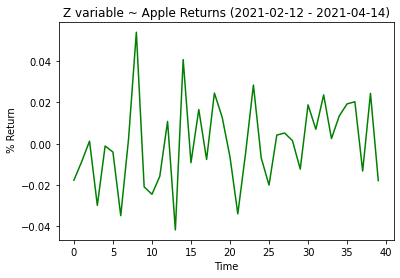

The std of Z is:  0.020637616470194325


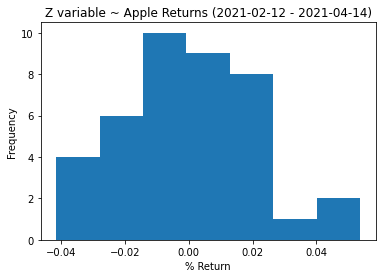

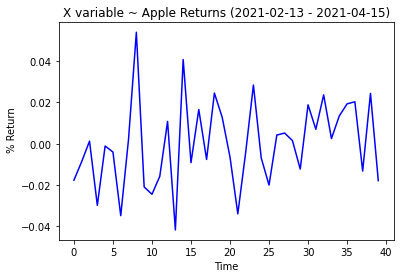

The std of X is:  0.020637616470194325


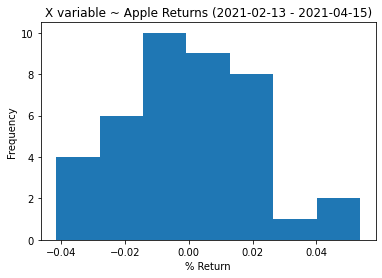

(40,)
The shape of q is:  (40, 40) [[0.02500842 0.02500479 0.02500081 ... 0.02500665 0.02499151 0.02500851]
 [0.0250075  0.02500572 0.02500377 ... 0.02500663 0.02499922 0.02500754]
 [0.02500435 0.02500461 0.02500489 ... 0.02500448 0.02500554 0.02500434]
 ...
 [0.0250082  0.02500548 0.02500249 ... 0.02500687 0.02499551 0.02500827]
 [0.02498831 0.02499331 0.0249988  ... 0.02499076 0.02501163 0.02498819]
 [0.02500842 0.02500475 0.02500072 ... 0.02500662 0.02499131 0.02500851]]
The size of vector y is:  (40,) The size of vector z is:  (40,)


NameError: name 'lamb' is not defined

In [12]:
# Test to compute with smaller data set
import scipy as sp
import seaborn as sns



data2 = yf.download("AAPL", start = "2021-02-12", end = "2021-04-14")
data22 = yf.download("AAPL", start = "2021-02-13", end = "2021-04-15")
data_test = yf.download("AAPL", start="2021-04-16", end="2021-07-30")

apple22 = data22["Close"]
Apple22 = np.array(apple22)
apple22_returns = financial_returns(Apple22)
apple2 = data2["Close"]
Apple2 = np.array(apple2)
apple2_returns = financial_returns(Apple2)
apple_test = data_test["Close"]
Apple_test = np.array(apple_test)
apple_test_returns = financial_returns(Apple_test)



y_avg = np.average(apple22_returns)
print(y_avg)



# Fix Dates for graphs, changed them multiple times to make data fit correctly

plt.plot(apple2_returns, "g")
plt.title("Z variable ~ Apple Returns (2021-02-12 - 2021-04-14)")
plt.xlabel("Time")
plt.ylabel(" % Return")
plt.show()
print("The std of Z is: ", np.std(apple2_returns))


plt.hist(apple2_returns, bins='auto')
plt.title("Z variable ~ Apple Returns (2021-02-12 - 2021-04-14)")
plt.ylabel("Frequency")
plt.xlabel("% Return")
plt.show()


# Graph of returns for X

plt.plot(apple22_returns, "b")
plt.title("X variable ~ Apple Returns (2021-02-13 - 2021-04-15)")
plt.xlabel("Time")
plt.ylabel(" % Return")
plt.show()
print("The std of X is: ", np.std(apple22_returns))


plt.hist(apple22_returns, bins='auto')
plt.title("X variable ~ Apple Returns (2021-02-13 - 2021-04-15)")
plt.ylabel("Frequency")
plt.xlabel("% Return")
plt.show()




print(np.shape(apple2_returns))

s = 2 * (40**(-1/5))

R = []
i=0
while(i<40):
    j=0
    while(j<40):
        R.append(Gaussian_Kernel(np.absolute(apple2_returns[j]-apple2_returns[i]), h=s))
        j=j+1
    i=i+1
matrix_RR = np.reshape(R, (40,40))
matrix_R = matrix_RR/np.sum(matrix_RR, axis = 1)
print("The shape of q is: ", np.shape(matrix_R), matrix_R)


print("The size of vector y is: ",np.shape(apple22_returns), "The size of vector z is: ", np.shape(apple2_returns))


y = apple22_returns

diff_L_F1 = lamb * np.sum(gradient_kernel_y((y_avg-y), s) * matrix_R)
diff_L_C1 = 2 * np.absolute(apple22_returns - y) * y
diff_obj1 = diff_L_C1 + diff_L_F1
L_F1 = lamb * np.sum(Gaussian_Kernel((y_avg-y), s) * matrix_R)
L_C1 = np.absolute(apple22_returns - y)**2
obj1 = L_F1 + L_C1

    
    
    
# Gradient Descent function 
   
def simple_gradient_descent1(learning_rate, lam):
    
    Beta = (learning_rate * diff_obj1)
    y_new = y - Beta
    return y_new


def gradient_descent1(learning_rate, lam, iterations):
    i = 0
    y = apple22_returns
    while i < iterations:
        Beta = (learning_rate * diff_obj1)
        y = y - Beta
        i = i+1
    return y




print("Updated Y after simple gradient descent using learning rate = 0.1, lambda = 0.2 = ", simple_gradient_descent1(learning_rate=0.1, lam=0.2))    
    
    
    
plt.plot(simple_gradient_descent1(learning_rate=0.1, lam=0.02))
plt.title("Predictions of Apple Returns for (2021-02-16 - 2021-04-16) based on Optimal Transport Algorithm")
plt.xlabel("Time")
plt.ylabel(" % Return")
plt.show()




plt.plot(simple_gradient_descent1(learning_rate=0.1, lam=0.02), "b")
plt.plot(apple22_returns, "g")
plt.plot(apple2_returns, "o")
plt.title("Predictions of Apple Returns for (2021-02-16 - 2021-04-16) based on Optimal Transport Algorithm")
plt.xlabel("Time")
plt.ylabel(" % Return")
plt.legend(["Predicted returns", "Actual returns", "Lagged Returns"])
plt.show()




# Error Plot
plt.plot(simple_gradient_descent1(learning_rate=0.1, lam=0.02) - apple22_returns, "r")
plt.title("Error of Predictions of Apple Returns for (2021-02-16 - 2021-04-16) based on Optimal Transport Algorithm")
plt.xlabel("Time")
plt.ylabel(" % Return")
plt.legend(["Predicted returns", "Actual returns"])
plt.show()




plt.plot(apple2_returns, "b")
plt.plot(apple22_returns, "g")
plt.legend(["1-Day lagged returns", "returns"])
plt.show()



print(diff_L_F1)

print("The x and z arrays are equal", np.array_equal(apple2_returns, apple22_returns))

print("updates y is the same as x", np.array_equal(simple_gradient_descent1(learning_rate=0.1, lam=0.02), apple22_returns))


Y_updated = simple_gradient_descent1(learning_rate=0.1, lam=0.02)


plt.plot(apple22_returns, Y_updated)
plt.legend(["actual returns", "predicted returns"])
plt.show()

print(apple22_returns - Y_updated, Y_updated)

print('The shape of diff_obj is : ', np.shape(diff_obj))

print("gradient descent using 1000 iterations", 
gradient_descent1(learning_rate=0.1, lam=0.02, iterations=1000))

plt.plot(gradient_descent1(learning_rate=0.1, lam=0.02, iterations=1000))
plt.plot(apple22_returns)
plt.title('Y Predicted vs Actual')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend(["Y Predicted after 1000 iterations", "Y Actual"])
plt.show()





print(np.shape(apple22_returns))

def time_loop(days):
    i=1
    time = np.array(0)
    while i < days:
        time = np.append(time, i)
        i=i+1
    return time

print(time_loop(40))
t = time_loop(40)

XX = np.concatenate((apple22_returns, t), axis = 0)

kde_y = sp.stats.gaussian_kde(XX, None, None)


plt.plot(kde_y)
plt.hist(apple22_returns, bins = 'auto')
plt.title('Gaussian KDE')
plt.show()

In [ ]:
# 361 Lines of Code Total

In [ ]:
plt.plot(Gaussian_Kernel((y_avg-y), h=0.1))
plt.show()

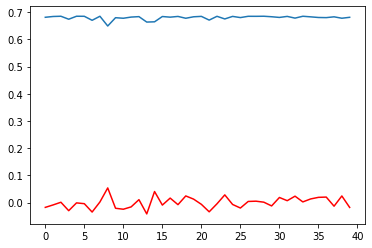

In [13]:
import statsmodels as sm
from sklearn.neighbors import KernelDensity
import math



kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(apple22_returns.reshape(-1,1))
kde.score_samples(apple22_returns.reshape(-1,1))


plt.plot(kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(apple22_returns.reshape(-1,1)))
plt.plot(kde.score_samples(apple22_returns.reshape(-1,1)))
plt.plot(apple22_returns, 'r')
plt.show()

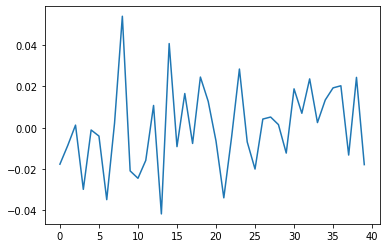

In [14]:
a = np.array([[t], [apple22_returns]])
np.shape(a)

plt.plot(apple22_returns)
plt.show()



In [15]:
y = apple22_returns
y_avg = np.average(y)
lamb = 0.1
a = (y_avg - y).reshape(-1,1)
diff_L_F1 = lamb * np.sum(KernelDensity(kernel='gaussian', bandwidth=0.01).fit(a) * matrix_R)
diff_L_C1 = 2 * np.absolute(apple22_returns - y) * y
diff_obj1 = diff_L_C1 + diff_L_F1
L_F1 = lamb * np.sum(KernelDensity(kernel='gaussian', bandwidth=0.01).fit(a) * matrix_R)
L_C1 = np.absolute(apple22_returns - y)**2
obj1 = L_F1 + L_C1

    

TypeError: unsupported operand type(s) for *: 'KernelDensity' and 'float'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.



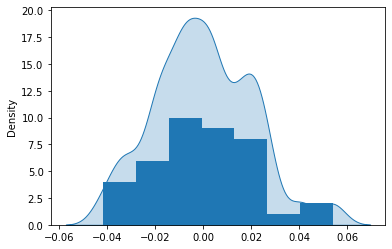

In [16]:
sns.kdeplot(y, shade = 'True', bw=0.25)
plt.hist(y, bins='auto')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.08 for `bw_method`, but please see the docs for the new parameters and update your code.



<AxesSubplot:ylabel='Density'>

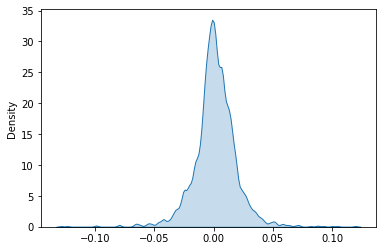

In [17]:
sns.kdeplot(apple_returns, shade=True, bw=0.08)

TypeError: unsupported operand type(s) for *: 'AxesSubplot' and 'float'

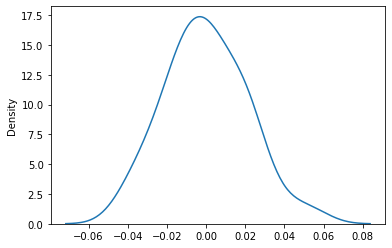

In [18]:
y = apple22_returns
y_avg = np.average(y)
lamb = 0.1
a = (y_avg - y).reshape(-1,1)
diff_L_F1 = lamb * np.sum(sns.kdeplot(y) * matrix_R)
diff_L_C1 = 2 * np.absolute(apple22_returns - y) * y
diff_obj1 = diff_L_C1 + diff_L_F1
L_F1 = lamb * np.sum(sns.kdeplot(y) * matrix_R)
L_C1 = np.absolute(apple22_returns - y)**2
obj1 = L_F1 + L_C1

In [19]:
y_avg = np.average(apple22_returns)
sigma = np.std(apple22_returns)
def G_K(one_d_data, sigma):
    i=1
    j=1
    for j in range apple22_returns:
        for i in range apple22_returns:
            (1/(2*math.pi*sigma)) * (np.exp((-(one_d_data[j] - one_d_data[i])**2)/(2*(sigma**2)))
            i = i+1
        
    
                            

SyntaxError: invalid syntax (<ipython-input-19-04e8ca4126ec>, line 6)

Kernel Density of y

<class 'scipy.stats.kde.gaussian_kde'>
0.009868418050489191
500


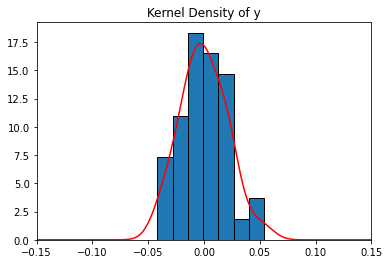

In [25]:
from scipy.stats import norm, gaussian_kde 
from sklearn.neighbors import KernelDensity



scipy_kernel = gaussian_kde(apple22_returns, 'scott')
print (type(scipy_kernel))
bw = scipy_kernel.factor * np.std(apple22_returns)
print(bw)



u = np.linspace(-0.45, 0.45, 500)
v = scipy_kernel.evaluate(u)


count, bins, patches = plt.hist(apple22_returns, bins = 'auto', density = True, edgecolor = 'Black')
plt.plot(u, v, 'r')
plt.xlim([-0.15,0.15])
plt.title('Kernel Density of y')

print(len(v))

Kernel Density of z

[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 8.89318163e-323 9.27855283e-320 9.21651795e-317
 8.86124174e-314 8.24666054e-311 7.42877956e-308 6.47757790e-305
 5.46718334e-302 4.46653201e-299 3.53210076e-296 2.70365665e-293
 2.00320691e-290 1.43666630e-287 9.97336736e-285 6.70167787e-282
 4.35894211e-279 2.74431825e-276 1.67241351e-273 9.86526326e-271
 5.63286719e-268 3.11319385e-265 1.66547699e-262 8.62436104e-260
 4.32285871e-257 2.09735030e-254 9.84978442e-252 4.47752786e-249
 1.97017902e-246 8.39129329e-244 3.45945697e-241 1.38052026e-238
 5.33253183e-236 1.99379245e-233 7.21576298e-231 2.52778650e-228
 8.57145091e-226 2.81335226e-223 8.93819252e-221 2.74872388e-218
 8.18216714e-216 2.35755264e-213 6.57521970e-211 1.77506786e-208
 4.63847767e-206 1.17325335e-203 2.87252589e-201 6.80756698e-199
 1.56162126e-196 3.467490

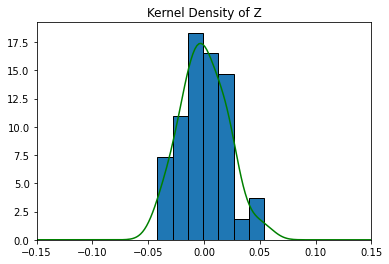

In [27]:
scipy_kernel_z = gaussian_kde(apple2_returns, 'scott')
u = np.linspace(-0.45, 0.45, 500)
vv = scipy_kernel_z.evaluate(u)
count, bins, patches = plt.hist(apple2_returns, bins='auto', density=True, edgecolor='Black')
plt.plot(u,vv,'g')
plt.xlim(-0.15,0.15)
plt.title('Kernel Density of Z')
print(vv)
sum_z = np.sum(vv)
Z = vv/sum_z
print(Z, len(Z))

In [22]:
scipy_kernel_yz = gaussian_kde(apple22_returns/apple2_returns, 'scott')
yz = scipy_kernel_yz.evaluate(u)
count, bins, patches = plt.hist(apple22_returns/apple2_returns, bins='auto', density=True, edgecolor='Black')
uu=np.linspace(-0.1, 0.1, 500)
plt.plot(uu,yz,'o')
plt.xlim(-10,10)

LinAlgError: singular matrix

Exception in thread Thread-11:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/urllib3/connectionpool.py", line 677, in urlopen
    chunked=chunked,
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/http/client.py", li

import nnkcde



z_train = apple2_returns
x_train = apple22_returns

k=39
model = nnkcde.NNKCDE(x_train,z_train)

n_grid = 1000
bandwidth = 0.01
z_grid = np.linspace(z_train.min(), z_train.max(), n_grid)

cde_test = model.predict(x_test, z_grid, bandwidth=bandwidth)


x_test = apple_test_returns

n_grid = 1000
bandwidth = 0.01
z_grid = np.linspace(z_train.min(), z_train.max(), n_grid)

cde_test = model.predict(x_test, z_grid, bandwidth=bandwidth)

In [29]:
def GaussKern(variable):
    return np.exp(-variable**2 / 2 * np.var(variable))
print(GaussKern(apple22_returns))





[0.99999993 0.99999998 1.         0.99999981 1.         1.
 0.99999974 1.         0.99999938 0.99999991 0.99999987 0.99999995
 0.99999998 0.99999963 0.99999965 0.99999998 0.99999994 0.99999999
 0.99999987 0.99999997 0.99999999 0.99999976 1.         0.99999983
 0.99999999 0.99999991 1.         0.99999999 1.         0.99999997
 0.99999993 0.99999999 0.99999988 1.         0.99999996 0.99999992
 0.99999991 0.99999996 0.99999987 0.99999993]


In [39]:
gk_z = gaussian_kde(apple22_returns, 'scott')
uuu = np.linspace(-0.50,0.50,10)
g_k_z = gk_z.evaluate(uuu)
sum_g_k_z = np.sum(g_k_z)
Z = g_k_z/sum_g_k_z
print("Z is equals to: ", Z)

Z is equals to:  [0.00000000e+000 3.98464866e-263 3.20546257e-122 5.39419608e-035
 3.19988927e-001 6.80011073e-001 1.06594122e-028 4.84197141e-110
 4.60008367e-245 0.00000000e+000]


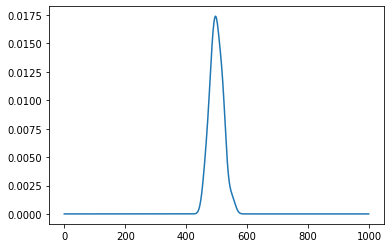

In [37]:
plt.plot(Z)
plt.show()